In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

ModuleNotFoundError: No module named 'seaborn'

In [268]:
df = pd.read_csv('fish_train.csv')
df.head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Roach,150.0,20.4,22.0,24.7,5.8045,3.7544
1,Perch,250.0,25.4,27.5,28.9,7.2828,4.5662
2,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
3,Bream,925.0,36.2,39.5,45.3,18.7542,6.7497
4,Perch,110.0,19.0,21.0,22.5,5.6925,3.5550


In [269]:
train, test = train_test_split(df, test_size=0.2, random_state=23, stratify=df['Species'])

In [270]:
weight = df['Weight']
Y_train = train.pop('Weight')
Y_test = test.pop('Weight')
weight

0       150.0
1       250.0
2       430.0
3       925.0
4       110.0
        ...  
114     273.0
115     500.0
116    1000.0
117     120.0
118     820.0
Name: Weight, Length: 119, dtype: float64

In [271]:
train.shape, test.shape

((95, 6), (24, 6))

In [272]:
train.mean(axis=0, numeric_only=True)

Length1    26.168421
Length2    28.329474
Length3    31.129474
Height      8.975294
Width       4.448602
dtype: float64

In [273]:
del train['Species']
del test['Species']
train.head(5)

,Length1,Length2,Length3,Height,Width
84,11.4,12.0,13.2,2.2044,1.1484
32,24.0,26.0,29.2,8.8768,4.4968
82,56.0,60.0,64.0,9.6000,6.1440
3,36.2,39.5,45.3,18.7542,6.7497
24,28.7,31.0,36.2,14.3714,4.8146


In [274]:
model = LinearRegression()
model.fit(train, Y_train)

LinearRegression()

In [275]:
model.coef_

array([ 90.74828925, -32.03177124, -35.15085491,  36.462831  ,
        30.78936768])

In [276]:
Y_pred = model.predict(test)

In [277]:
compare = pd.DataFrame({'Predict': Y_pred, 'Actually': Y_test})
compare.head(5)

,Predict,Actually
31,685.061467,800.0
62,621.284657,456.0
43,219.195205,160.0
26,542.001459,500.0
80,424.160555,300.0


In [278]:
r2_score(Y_test, Y_pred)

0.8885408749541968

,Length1,Length2,Length3,Height,Width
84,11.4,12.0,13.2,2.2044,1.1484
32,24.0,26.0,29.2,8.8768,4.4968
82,56.0,60.0,64.0,9.6000,6.1440
3,36.2,39.5,45.3,18.7542,6.7497
24,28.7,31.0,36.2,14.3714,4.8146
47,26.3,29.0,33.5,12.7300,4.4555


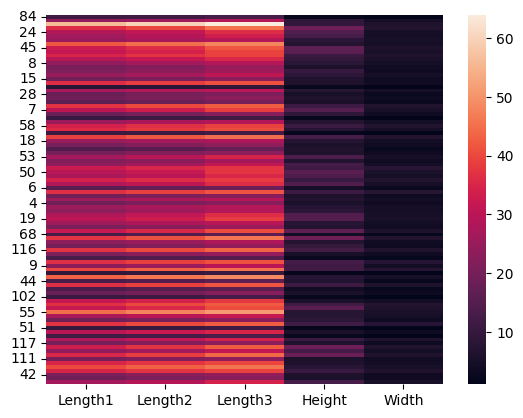

In [279]:
sns.heatmap(train)
train.head(6)

In [280]:
train_main = train
train = train.drop(['Height', 'Width'], axis=1) 

In [281]:
pca = PCA(n_components=1, svd_solver='full')
pca.fit(train)
data_trasformed = pca.fit_transform(train) # Перевод в базис главных компонент 
explained_var = np.cumsum(pca.explained_variance_ratio_) # считаем долю объясненной дисперсии

print(explained_var)
# print(explained_var[1])



[0.99604103]


In [282]:
Lengths = data_trasformed
Lengths

array([[-2.83888965e+01],
       [-3.69350201e+00],
       [ 5.45162318e+01],
       [ 2.05627148e+01],
       [ 6.02998760e+00],
       [ 1.92429082e+00],
       [-2.61473379e+00],
       [ 2.84974788e+01],
       [ 1.43255006e+01],
       [ 1.10562976e+01],
       [ 1.45616637e+01],
       [ 6.11644725e+00],
       [-3.29093369e+00],
       [-1.07050690e+01],
       [-9.02118074e+00],
       [-1.71669659e+00],
       [-1.34928365e+01],
       [ 1.72170515e+01],
       [-3.52693635e+01],
       [-3.36674746e-02],
       [-1.53233814e+01],
       [-1.30811767e+01],
       [-1.77003726e+01],
       [ 1.95964252e+01],
       [ 9.51324060e+00],
       [-1.43488595e+01],
       [-3.02417738e+01],
       [-2.26894396e+00],
       [ 1.37591532e+01],
       [ 1.63525769e+01],
       [-2.94836843e+01],
       [ 2.30627751e+01],
       [-3.61485405e+00],
       [-1.16626878e+01],
       [-2.22249010e+01],
       [-1.16626878e+01],
       [ 3.33735056e+00],
       [-7.80573074e+00],
       [-2.2

In [283]:
train_main = train_main.drop(['Length1', 'Length2', 'Length3'], axis=1)
train_main['Lengths'] = Lengths
train_main['Weight'] = weight
train_main.head(5)

,Height,Width,Lengths,Weight
84,2.2044,1.1484,-28.388897,9.8
32,8.8768,4.4968,-3.693502,290.0
82,9.6000,6.1440,54.516232,1550.0
3,18.7542,6.7497,20.562715,925.0
24,14.3714,4.8146,6.029988,500.0


In [284]:
train, test = train_test_split(train_main, test_size=0.2, random_state=23)
Y_train = train.pop('Weight')
Y_test = test.pop('Weight')
print(train.head(3), test.head(3))

      Height   Width    Lengths
86    3.8240  2.4320 -23.647052
47   12.7300  4.4555   1.924291
118  12.4313  7.3514  18.011110     Height   Width    Lengths
33  7.2900  4.5765  16.352577
63  5.6925  3.6675 -13.391637
10  5.9175  3.3075 -13.391637


In [286]:
model = LinearRegression()
model.fit(train, Y_train)

LinearRegression()

In [288]:
Y_pred = model.predict(test)

In [292]:
compare = pd.DataFrame({'Actually': Y_test, 'Predict': Y_pred})
compare.head(10)

,Actually,Predict
33,430.0,557.969627
63,125.0,170.542851
10,115.0,153.003220
3,925.0,860.004384
107,270.0,332.737198
106,13.4,-156.448206
14,150.0,199.548538
21,900.0,792.947750
76,345.0,523.031938
56,685.0,648.578170


In [293]:
r2_score(Y_pred, Y_test)

0.8720866718087126